# **Assignment 9**

In [11]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

#plotly or other graphing library

In [12]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

# The boston dataset was removed from sklearn in 1.2. This is the workaround below:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Richie\AppData\Local\Temp\ipykernel_25180\2805831171.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [13]:
print(f"Targets: {iris.target}")

pd.DataFrame(data = iris.data, columns = iris.feature_names).head()

Targets: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [14]:
iris_knn = KNN(n_neighbors = 5)

iris_knn.fit(iris.data, iris.target)

preds = iris_knn.predict(iris.data)

full_name_preds = []
for e in preds:
    full_name_preds.append(iris.target_names[e])

full_name_preds

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 '

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [17]:
x_train, x_test, y_train, y_test = tts(
    iris.data,
    iris.target
)

tts_iris_knn = KNN(n_neighbors = 5)
tts_iris_knn.fit(
    x_train,
    y_train
)

tts_iris_y_pred = tts_iris_knn.predict(x_test)

accuracy_score(
    y_test,
    tts_iris_y_pred
)

0.9473684210526315

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [25]:
knn_result = []

for e in range(1, len(y_train)):
    t_knn_model = KNN(n_neighbors = e)
    t_knn_model.fit(
        x_train,
        y_train
    )

    t_preds = t_knn_model.predict(x_test)

    t_accuracy_score = accuracy_score(
        y_test,
        t_preds
    )

    knn_result.append({
        'neighbors' : e,
        'accuracy_score' : t_accuracy_score,
        'model' : t_knn_model
    })

knn_result_df = pd.DataFrame(knn_result).set_index('neighbors')

knn_result_df.head()

,accuracy_score,model
neighbors,,
1,0.947368,KNeighborsClassifier(n_neighbors=1)
2,0.947368,KNeighborsClassifier(n_neighbors=2)
3,0.947368,KNeighborsClassifier(n_neighbors=3)
4,0.973684,KNeighborsClassifier(n_neighbors=4)
5,0.947368,KNeighborsClassifier()


<Axes: xlabel='neighbors'>

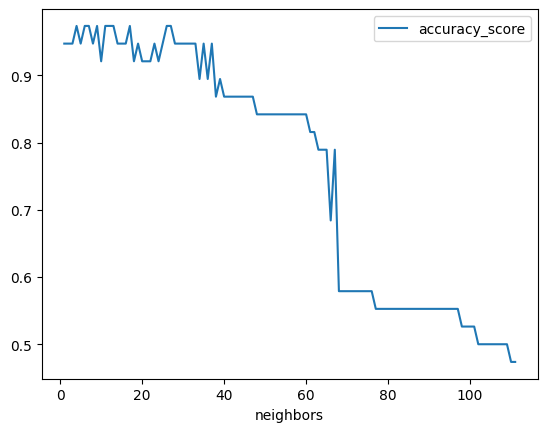

In [28]:
knn_result_df[['accuracy_score']].plot()

In [29]:
print('From the above graph, we can see that the accuracy drops off very quickly.')

From the above graph, we can see that the accuracy drops off very quickly.
